# Which coin has the most abnromal 1h candles?

In [17]:
from DataManagement.data_manager import DataManager
from DataManagement.coin_data import CoinData
from constants import ATR_ABNORMALITY_COLUMN

import matplotlib.pyplot as plt

In [12]:
data_manager = DataManager()

In [13]:
abnormality_time_frame = "1h"
coin_symbol_list = ["BTCUSDT", "ETHUSDT", "ADAUSDT"]

In [14]:
coin_data_list = [data_manager.get_historical_data_CoinData(symbol=symbol, kline_size=abnormality_time_frame) for symbol in coin_symbol_list]
coin_symbol_num_abnormal_1h_candle_dict = {cd.coin_symbol:sum(cd.df[ATR_ABNORMALITY_COLUMN]==1) for cd in coin_data_list}

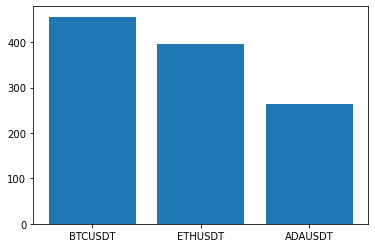

In [19]:
sorted_dict = dict(sorted(coin_symbol_num_abnormal_1h_candle_dict.items(), key=lambda x: x[1], reverse = True))
plt.bar(*zip(*sorted_dict.items()));